<a href="https://colab.research.google.com/github/Sruthi5311/Neural/blob/main/700761799_ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0012 - loss: 0.6943 - val_accuracy: 0.0012 - val_loss: 0.6941
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0011 - loss: 0.6940 - val_accuracy: 0.0012 - val_loss: 0.6938
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0015 - loss: 0.6938 - val_accuracy: 0.0012 - val_loss: 0.6936
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0015 - loss: 0.6935 - val_accuracy: 0.0013 - val_loss: 0.6933
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0015 - loss: 0.6932 - val_accuracy: 0.0013 - val_loss: 0.6930


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 9.3129e-04 - loss: 0.6968 - val_accuracy: 0.0016 - val_loss: 0.6966
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 6.1815e-04 - loss: 0.6965 - val_accuracy: 0.0017 - val_loss: 0.6963
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 8.8769e-04 - loss: 0.6963 - val_accuracy: 0.0016 - val_loss: 0.6961
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 8.6936e-04 - loss: 0.6960 - val_accuracy: 0.0016 - val_loss: 0.6958
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 7.8936e-04 - loss: 0.6957 - val_accuracy: 0.0016 - val_loss: 0.6955


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


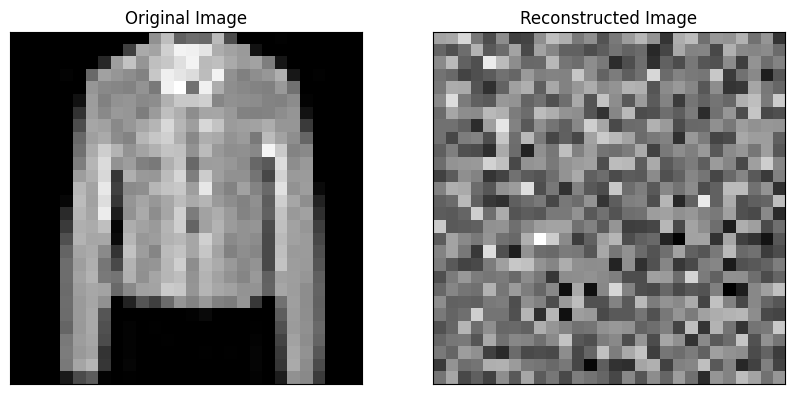

In [ ]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


In [ ]:

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0012 - loss: 0.6950 - val_accuracy: 0.0015 - val_loss: 0.6948
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0012 - loss: 0.6948 - val_accuracy: 0.0015 - val_loss: 0.6946
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0016 - loss: 0.6946 - val_accuracy: 0.0015 - val_loss: 0.6944
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0016 - loss: 0.6944 - val_accuracy: 0.0015 - val_loss: 0.6942
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0014 - loss: 0.6942 - val_accuracy: 0.0015 - val_loss: 0.6940
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0017 - loss: 0.6940 - val_accuracy: 0.0015 - val_loss: 0.6938
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0012 - loss: 0.6938 - val_accuracy: 0.0015 - val_loss: 0.6936
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0014 - loss: 0.6936 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


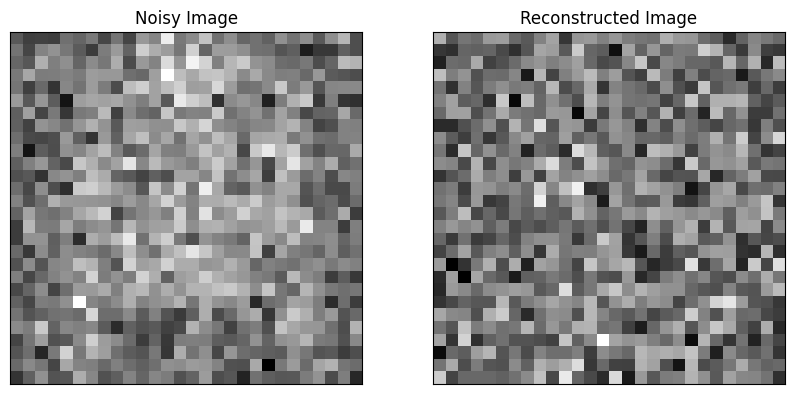

In [ ]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0014 - loss: 0.6930 - val_accuracy: 0.0016 - val_loss: 0.6929
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0012 - loss: 0.6929 - val_accuracy: 0.0017 - val_loss: 0.6927
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0018 - loss: 0.6927 - val_accuracy: 0.0017 - val_loss: 0.6926
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0018 - loss: 0.6925 - val_accuracy: 0.0017 - val_loss: 0.6924
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0013 - loss: 0.6923 - val_accuracy: 0.0017 - val_loss: 0.6922
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0012 - loss: 0.6921 - val_accuracy: 0.0017 - val_loss: 0.6920
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0014 - loss: 0.6920 - val_accuracy: 0.0018 - val_loss: 0.6919
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0013 - loss: 0.6918 - val_accu

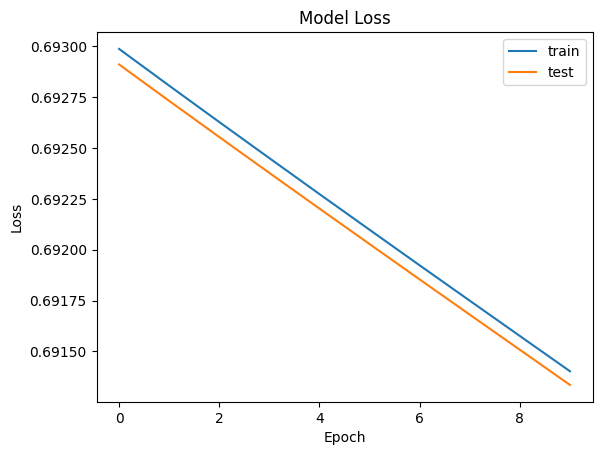

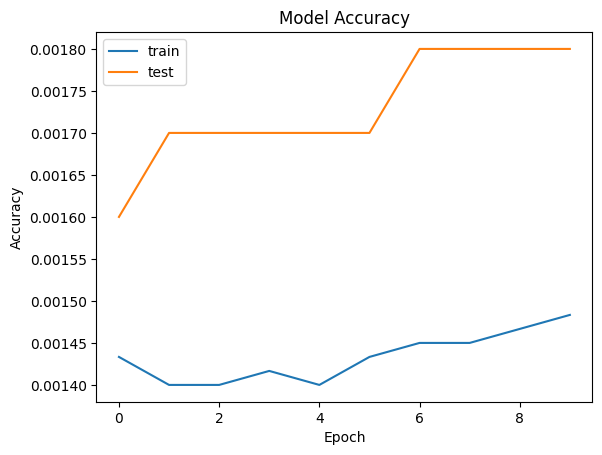

In [ ]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


zoom link:

https://drive.google.com/file/d/1tsKx1_84ILvtW1UEhU2o3ZXPiql2vRnj/view?usp=sharing